In [39]:
words = open('names.txt', 'r')

In [40]:
words = words.read().splitlines()

In [41]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [42]:
len(words)

32033

# Designing biagram model

In [43]:
b = {}
for word in words:
    chrr = ['<s>'] + list(word) + ['<e>']
    for ch1, ch2 in zip(chrr, chrr[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) + 1
        # print(ch1, ch2)

In [44]:
len(b)

627

In [45]:
# sorted(b.items(), key=lambda x: x[1], reverse=True)

In [46]:
import torch

In [47]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [48]:
for word in words:
    chrr = ['S'] + list(word) + ['E']
    for ch1, ch2 in zip(chrr, chrr[1:]):
        if ch1 == 'S':
            N[26, ord(ch2) - ord('a')] += 1
        elif ch2 == 'E':
            N[ord(ch1) - ord('a'), 27] += 1
        else:
            N[ord(ch1) - ord('a'), ord(ch2) - ord('a')] += 1

In [49]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

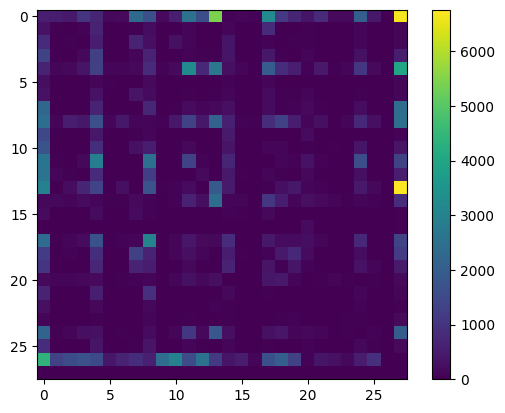

In [51]:
# Show N visually good
plt.imshow(N, origin='upper')
plt.colorbar()
plt.show()

In [52]:
N[0,:]

tensor([ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
        1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
        2050,  435,    0, 6640], dtype=torch.int32)

In [53]:
# Create Probability Matrix
P = torch.zeros_like(N, dtype=torch.float)

In [54]:
P = (N+2) / N.sum(dim=1, keepdim=True)

In [55]:
P[0,:]

tensor([1.6467e-02, 1.6025e-02, 1.3929e-02, 3.0810e-02, 2.0481e-02, 4.0136e-03,
        5.0170e-03, 6.8880e-02, 4.8753e-02, 5.2236e-03, 1.6822e-02, 7.4664e-02,
        4.8281e-02, 1.6054e-01, 1.9183e-03, 2.4790e-03, 1.8297e-03, 9.6385e-02,
        3.3053e-02, 2.0333e-02, 1.1303e-02, 2.4672e-02, 4.8104e-03, 5.4301e-03,
        6.0558e-02, 1.2897e-02, 5.9023e-05, 1.9602e-01])

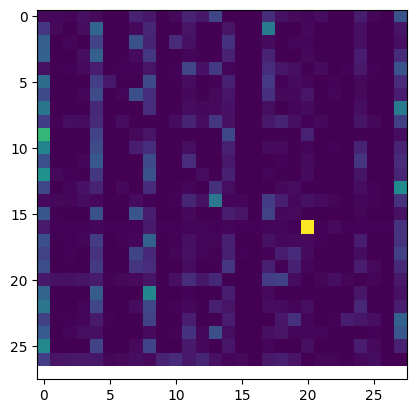

In [56]:
# Show P visually good
plt.imshow(P, origin='upper')

In [57]:
g = torch.Generator().manual_seed(42)
for i in range(10):
    out = []
    ix = 0
    while ix != 27:
        ix = torch.multinomial(P[ix], 1, replacement=True, generator=g).item()
        if ix == 27:
            break
        elif ix == 26:
            out.append(' ')
        else:
            current_char = chr(ix + ord('a'))  # Convert index to corresponding character
            out.append(current_char)
    
    # Join the characters in the output list to form a string
    generated_string = ''.join(out)
    print(generated_string)



yneeraipahron
nn
enaetayn

tikon
ba
yallarale
iahohelielelaiusananeat
no
nora


# Goal:  maximize likelihood of the training data wrt the model parameters
# Equivalently: minimize the negative log likelihood
# Equivalently: minimize the loss function that is the avaerage negative log likelihood

In [61]:
log_likelihood = 0.0 # More negative the number, weaker the model
n=0
for word in words:
    chrr = ['<s>'] + list(word) + ['<e>']
    for ch1, ch2 in zip(chrr, chrr[1:]):
        if ch1 == '<s>':
            prob = P[26, ord(ch2) - ord('a')]
        elif ch2 == '<e>':
            prob = P[ord(ch1) - ord('a'), 27]
        else:
            prob = P[ord(ch1) - ord('a'), ord(ch2) - ord('a')]
        n+=1
        desired_prob = 1.0/28
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        # print(f'P({ch1}|{ch2}) in % is {prob * 100:.2f} {prob > desired_prob}, log_prob is {log_prob:.2f}')
        # print(ch1, ch2)
print(f'Log Likelihood of the words is {log_likelihood:.2f}')
negative_log_likelihood = -log_likelihood
print(f'Negative Log Likelihood of the  words is {negative_log_likelihood:.2f}')
print(f'Averaged Negative Log Likelihood of the words is {negative_log_likelihood/n:.2f}') #Loss Function

Log Likelihood of the words is -558743.88
Negative Log Likelihood of the  words is 558743.88
Averaged Negative Log Likelihood of the words is 2.45


In [62]:
log_likelihood = 0.0 # More negative the number, weaker the model
n=0
for word in ["Shashank"]:
    chrr = ['<s>'] + list(word) + ['<e>']
    for ch1, ch2 in zip(chrr, chrr[1:]):
        if ch1 == '<s>':
            prob = P[26, ord(ch2) - ord('a')]
        elif ch2 == '<e>':
            prob = P[ord(ch1) - ord('a'), 27]
        else:
            prob = P[ord(ch1) - ord('a'), ord(ch2) - ord('a')]
        n+=1
        desired_prob = 1.0/28
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        print(f'P({ch1}|{ch2}) in % is {prob * 100:.2f} {prob > desired_prob}, log_prob is {log_prob:.2f}')
        # print(ch1, ch2)
print(f'Log Likelihood of the first 3 words is {log_likelihood:.2f}')
negative_log_likelihood = -log_likelihood
print(f'Negative Log Likelihood of the first 3 words is {negative_log_likelihood:.2f}')
print(f'Averaged Negative Log Likelihood of the words is {negative_log_likelihood/n:.2f}') #Loss Function

P(<s>|S) in % is 1.24 False, log_prob is -4.39
P(S|h) in % is 2.18 False, log_prob is -3.83
P(h|a) in % is 29.49 True, log_prob is -1.22
P(a|s) in % is 3.31 False, log_prob is -3.41
P(s|h) in % is 15.88 True, log_prob is -1.84
P(h|a) in % is 29.49 True, log_prob is -1.22
P(a|n) in % is 16.05 True, log_prob is -1.83
P(n|k) in % is 0.33 False, log_prob is -5.72
P(k|j) in % is 0.08 False, log_prob is -7.14
P(j|q) in % is 0.07 False, log_prob is -7.28
P(q|<e>) in % is 11.03 True, log_prob is -2.20
Log Likelihood of the first 3 words is -40.08
Negative Log Likelihood of the first 3 words is 40.08
Averaged Negative Log Likelihood of the words is 3.64
